# E-commerce Customer Segmentation

In [1]:
import pandas as pd
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("cust_data.xlsx")
df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


# EDA Analysis

In [3]:
# Checking the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [4]:
# Statistic Summary
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [5]:
# check duplicat values
df.duplicated().sum()

0

In [6]:
# check the null values
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [7]:
df['Gender'].unique()

array(['M', 'F', nan], dtype=object)

In [8]:
df['Gender'].value_counts()

Gender
F    22054
M     5222
Name: count, dtype: int64

In [9]:
df['Gender'].fillna('F', inplace=True)

<Axes: xlabel='Gender'>

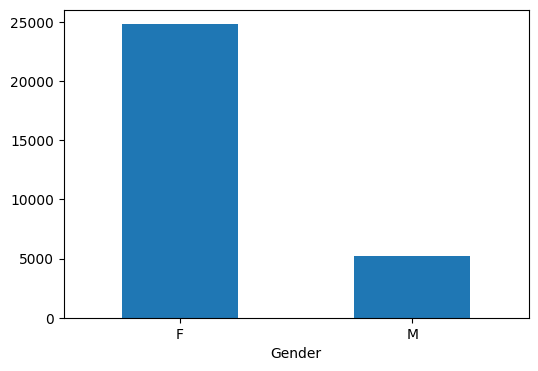

In [10]:

plt.figure(figsize=(6,4))
df.Gender.value_counts().plot(kind='bar', rot = 0)


In [11]:
df1=df.iloc[:,3:38]

In [12]:
df1.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Jordan                  30000 non-null  int64
 1   Gatorade                30000 non-null  int64
 2   Samsung                 30000 non-null  int64
 3   Asus                    30000 non-null  int64
 4   Udis                    30000 non-null  int64
 5   Mondelez International  30000 non-null  int64
 6   Wrangler                30000 non-null  int64
 7   Vans                    30000 non-null  int64
 8   Fila                    30000 non-null  int64
 9   Brooks                  30000 non-null  int64
 10  H&M                     30000 non-null  int64
 11  Dairy Queen             30000 non-null  int64
 12  Fendi                   30000 non-null  int64
 13  Hewlett Packard         30000 non-null  int64
 14  Pladis                  30000 non-null  int64
 15  Asics              

## check the outliers using boxplot

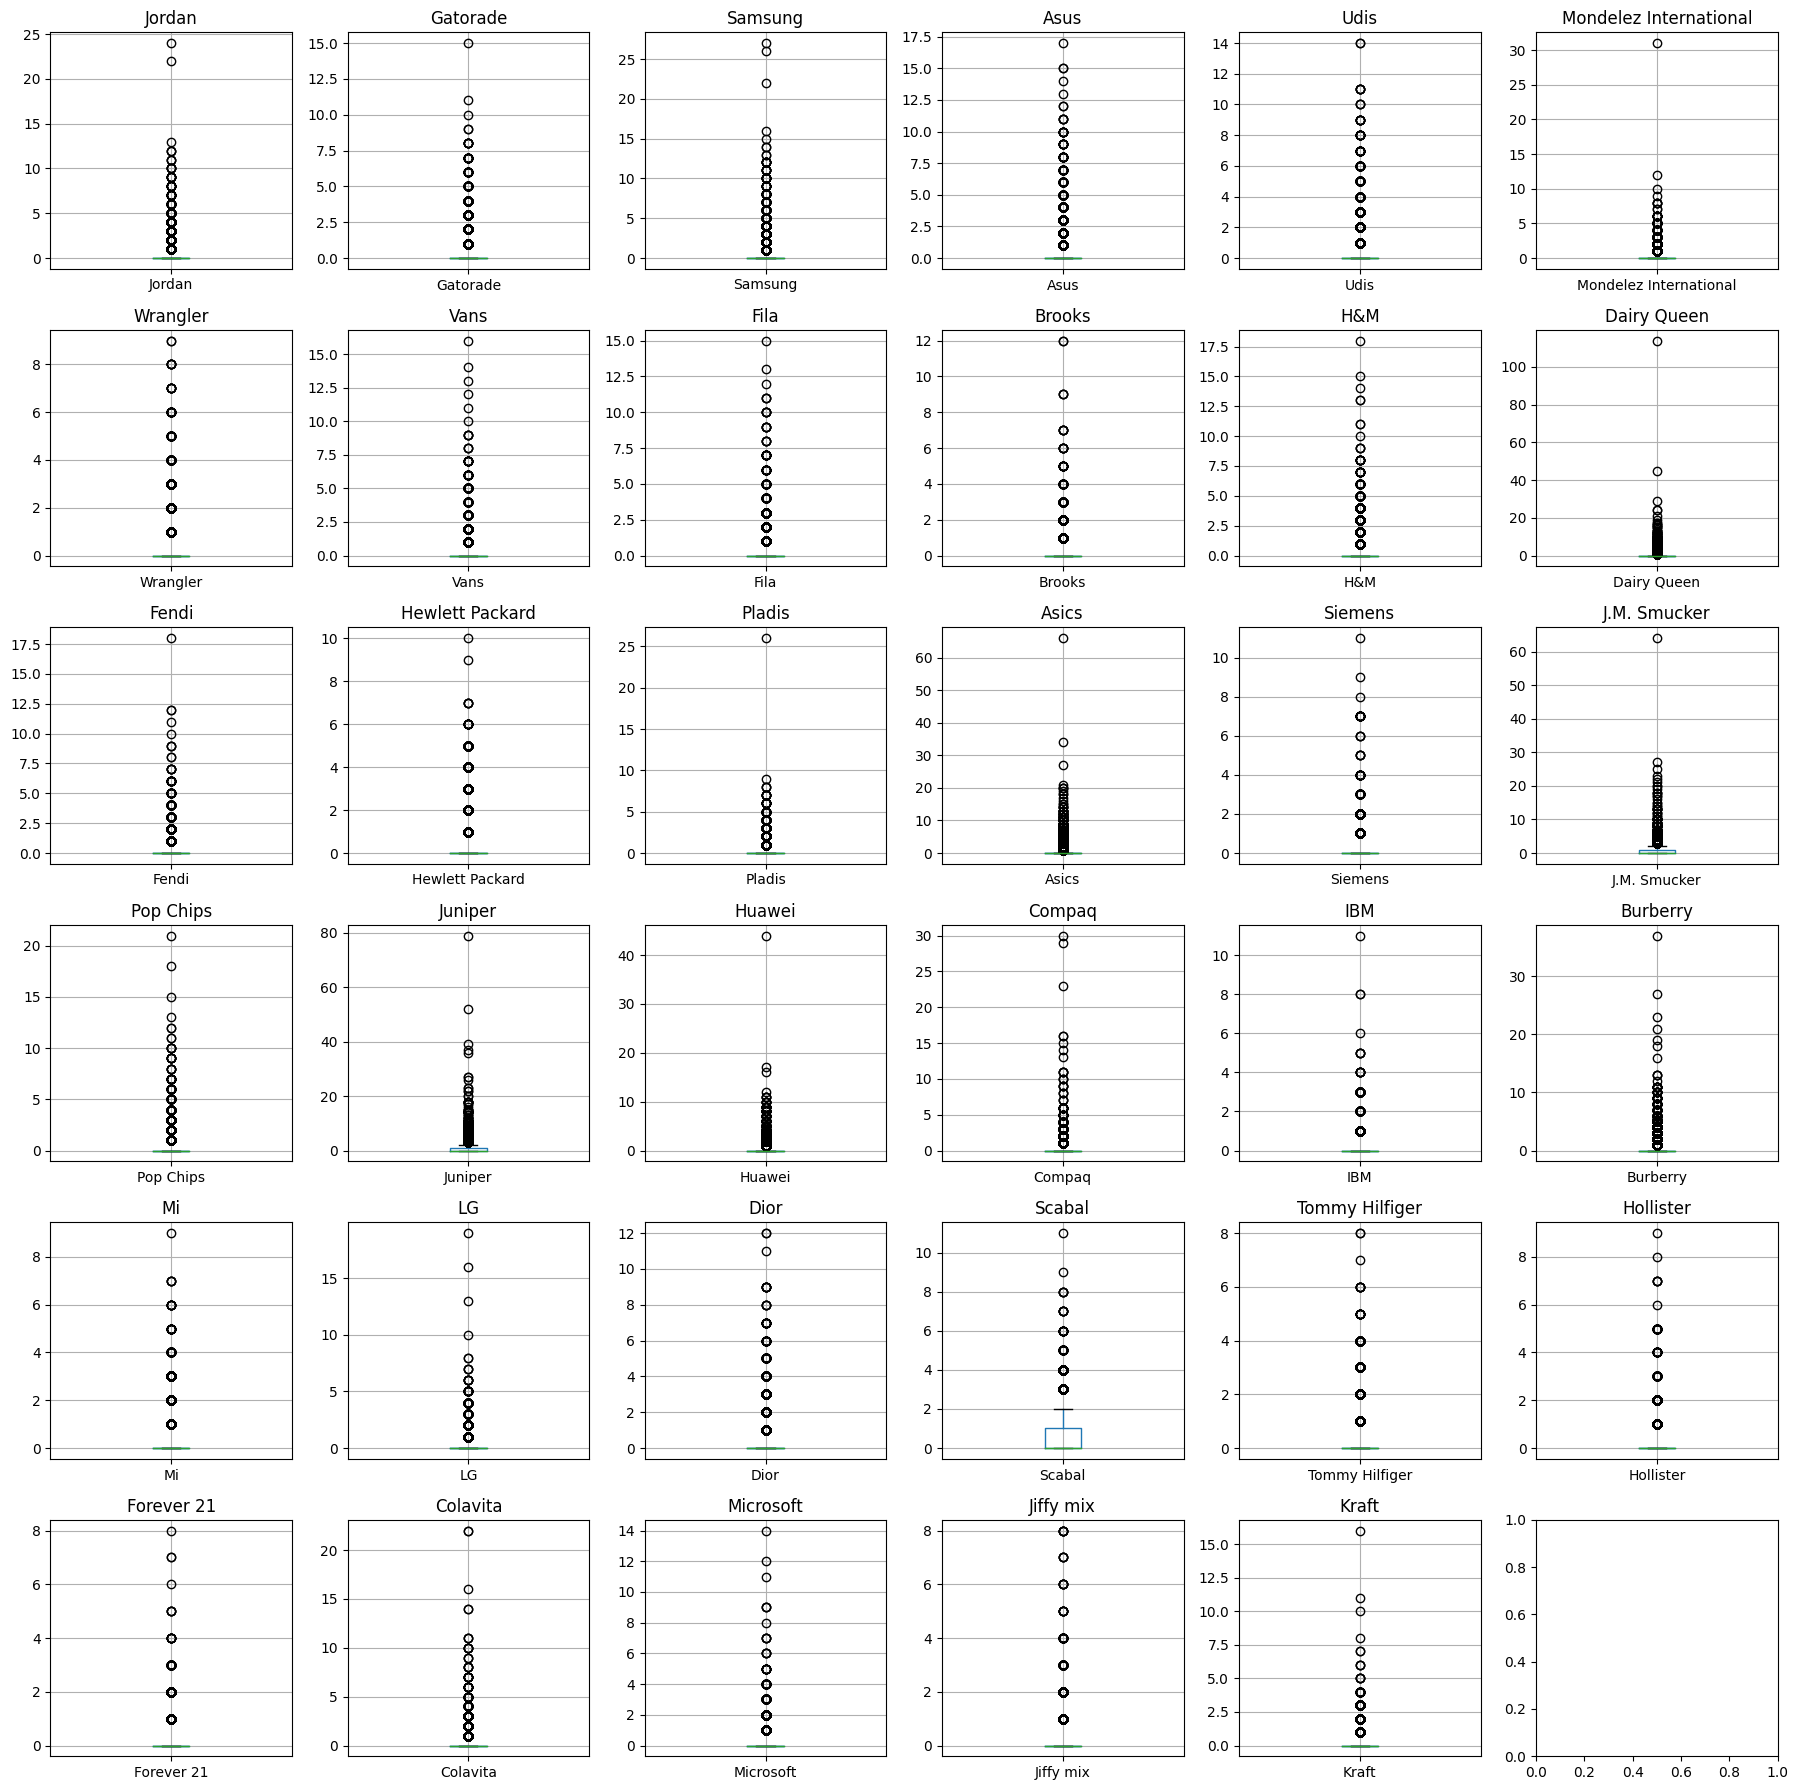

In [14]:
columns_to_plot = df1.columns[:36]

fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(18, 18))
for i, column in enumerate(columns_to_plot):
    ax = axes[i // 6, i % 6]  # Get the appropriate axis for the subplot
    df1.boxplot(column=column, ax=ax)  
    ax.set_title(column)  
plt.tight_layout() 
plt.show()

# creating the clusters using k-means

Forming clusters with K = 1 to 10

In [15]:
wss = []
for i in range(1,11):
    k_means = KMeans(n_clusters = i, random_state=0)
    k_means.fit(df1)
    wss.append(k_means.inertia_)

In [16]:
a=[1,2,3,4,5,6,7,8,9,10]

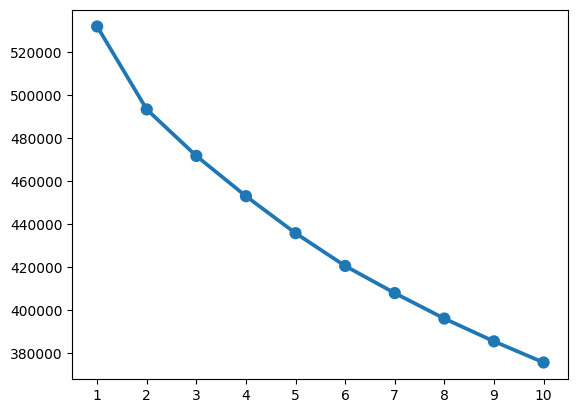

In [17]:
sns.pointplot(x=a, y=wss)
plt.show()

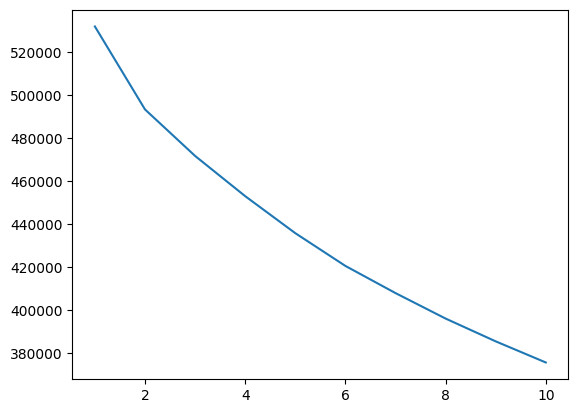

In [18]:
plt.plot(a, wss)
plt.show()

## Cluster evaluation for 2, 3 clusters

In [19]:
labels=[]
for i in range(2,4):
    k_means = KMeans(n_clusters = i,random_state=0)
    k_means.fit(df1)
    labels.append(k_means.labels_)

 checking the silhouette score

In [20]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [21]:
for labels in labels:
    clusters = silhouette_score(df1,labels,random_state=0)
    print(clusters)

0.4249439803215607
0.4145090057933197


In [22]:
k_means = KMeans(n_clusters = 2,random_state=0)
k_means.fit(df1)
labels = k_means.labels_

## Best silhouette score is a clusters 2. So final clusters will be 2

In [34]:
df1["Brand"] = labels
df1.head()

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster,Brand
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,1,1,1


In [37]:
df1.Brand.value_counts().sort_index()

Brand
0    26504
1     3496
Name: count, dtype: int64

In [38]:
clust_profile=df1.groupby('Brand').sum()
clust_profile['Brand']=df1.cluster.value_counts().sort_index()

clust_profile

,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,Fila,Brooks,...,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,cluster,Brand
Brand,,,,,,,,,,,,,,,,,,,,,
0,6090,5888,5277,3871,3459,3334,2476,2595,2292,3037,...,8807,3132,1791,1269,3791,2473,1691,1137,0,26504
1,1933,1682,1411,969,847,859,732,748,536,1167,...,2295,1637,539,451,1975,1018,950,990,3496,3496


# <br>


----
 ## <center>CLUSTER 1 REPORT</center> 
---

We can use **cluster 1** for brand search analysis which hold highest brand searches around **26437** customers

#####  MOST AND LEAST SEARCHED BRAND BY CUSTOMER
- Most frequent searched brand by customer is  **J.M. Smucker**
	Customer are likely to search ***food*** related brands <br>
- Least frequent searched brand by customer is   **IBM**

<br>

##### <center> HERE I LISTED SOME OF THE BRANDS HOLD THE  TOP CUSTOMER BASE</center>


|TYPE OF INDUSTRY | BRANDS   |
|--|--|
| Food and Drink | ***J.M. Smucker*** , ***Gatorade*** |
|   Fashion brands         | ***Scabal, H&M, Dior, Burberry***     |
|Technology and Networking | ***Juniper***                         |
|Mobile brands             | ***Samsung*** and ***Huawei***        |
|Sports brands             | ***Jordan***                          |



> <font color='green'>CLUSTER 1 - BRANDS MOSTLY ENGAGED BY CUSTOMERS WHILE BRAND SEARCHING AND AN INFLUENCE OF PREVILAGE TO MODERATE CUSTOMER FOR PLACING ORDERS</font>
>> ##### OVERALL CONCLUSION FOR CLUSTER 1 IS CUSTOMER LIKELY TO SEARCH FOOD , CLOTHING , MOBILES AND SPORTWEARS BRANDS

<br>
<br>

---
### <center>CLUSTER 0 REPORT</center> 
---


We can see that **cluster 0** hold low-set brand searches around **3563** customers <br>

> <font color='red'>CLUSTER 0 - INEXPENSIVE BRANDS  AND THIS LEADS TO LESS INFULENCE OF PREVILAGE CUSTOMER WHILE SEARCHING OF BRANDS</font>
>> ###### BY ADDING FESTIVE OFFERS  AND REASONABLE DISCOUNTS IT LEADS TO FASCINATE ABOUT THE BRANDS WHILE CUSTOMERS SEARCHING FOR A PRODUCTS  
>>> ##### OVERALL CONCLUSION FOR CLUSTER 0 IS IT WILL ATTRACT LESS NUMBER OF CUSTOMERS 



##### CONCLUSION:
---
<br>

In E-commerce customer segmentation the k-Means clustering plays major role for identifying the purchase pattern based on customer interest ,Here I used **silhoutte score** for finding an optimal cluster number to predict the right **n_cluster**.
<br>

After that splitting cluster into **cluster 1** is previlge to moderate customer and **cluster 0** is low-set of interest in purchasing